# Capstone Project  




### A stock or Index Price Predictor

In [1]:
#Importing the major libraries 

import sklearn# Features various classification, regression and clustering algorithm
import numpy as np #Adding support for large, multi-dimensional arrays and matrices 
import pandas as pd #Provides fast, flexible and expressive data structures 
import matplotlib.pyplot as plt#A plotting library for Python and its numerical extension Numpy
import datetime as dt #A module that supplies classes for manipulating dates and time 
from matplotlib import style
import pandas_datareader.data as web #Getting data from the data provider's website 
import seaborn as sns  #A visualization library , provides high-level interface for drawing attractive statistical graphics 
from math import sqrt #Will use this square root function to calculate RMSE



In [3]:
#Getting the data for a stock or Index



start = dt.datetime(2000,1,1)   #The start date for the data 
end = dt.datetime(2017,8,31)      # The end date for the purpose of this analysis 
df= web.DataReader('GE', 'yahoo', start, end)# Getting the data for a stock in this case General Electric from yahoo! Finance
print (df.head())# a representation of the first 5 set of data 
print (df.tail())# a representation of the last 5 set of the data 

df.to_csv('GE.csv') #converting the data retrieved into a csv file 


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-01-03  51.000000  51.229168  49.729168  50.000000  28.911114  22069800
2000-01-04  49.083332  49.333332  48.000000  48.000000  27.754667  22121400
2000-01-05  47.916668  49.000000  47.520832  47.916668  27.706484  27292800
2000-01-06  47.708332  48.979168  47.541668  48.557266  28.076889  19873200
2000-01-07  49.333332  50.625000  49.000000  50.437500  29.164083  20141400
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-08-25  24.389999  24.600000  24.350000  24.490000  24.247725  22867800
2017-08-28  24.530001  24.670000  24.350000  24.469999  24.227922  23937600
2017-08-29  24.330000  24.459999  24.280001  24.440001  24.198219  23910100
2017-08-30  24.490000  24.490000  24.150000  24.280001  24.039803  33876000
2017-08-31  

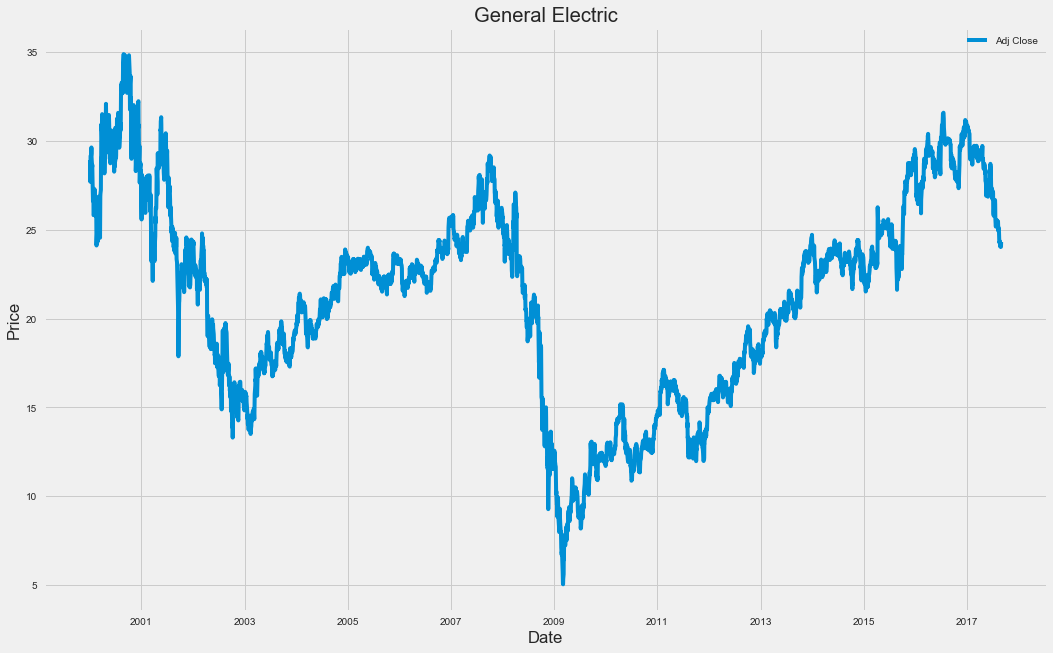

In [4]:
#Visualizations 



#Get the adjusted close price for the stock for the stated period for analysis 
Adj_close=web.DataReader('GE', 'yahoo', start, end)['Adj Close']

#print(Adj_close)

#graphing the Data

style.use('fivethirtyeight') 

#Set the size of the graph display
plt.figure(figsize=(16,10))

plt.plot(Adj_close)    
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
lw=0.1
plt.title('General Electric')
plt.show()

    


### Generating Features 

In [5]:
def generate_features(df):
    """Generating features for a chosen stock or Index based on historical price and performance
    the arguments passed to this function are df(dataframe with columns:"Open", "Close", "High", "Low", "Volume", "Adjusted Close)
    Function Returns:
        dataframe, data set with new features """
    df_new= pd.DataFrame()
    # The six original features
    
    df_new['open']= df['Open']
    df_new['Open_1']= df['Open'].shift(1) # This method shift index by 1, in order to take the value of previous day. 
    
    
    df_new['close_1'] = df['Close'].shift(1)
    
    df_new['high_1']= df['High'].shift(1)
    
    df_new['low_1'] = df['Low'].shift(1)
    
    df_new['volume_1'] = df['Volume'].shift(1)
    
    # The 31 Features to Generate from the 6 original 
    
    # Average price 
    #The window sizes are rounded to 5 days, 21 days and 252 to represent the number of trading days in a week, month and year.
    
    
    df_new['avg_price_5']= pd.Series.rolling(df['Close'],window=5,center=False).mean().shift(1)
    
    #rolling_mean calculates the moving average given a window {(Example [1,2,1,,4,3,2,1,4]->[N/A,N/A,N/A,N/A,2.2,2.42.2,2.8])}
       
    df_new['avg_price_30']=pd.Series.rolling(df['Close'], window=21, center=False).mean().shift(1)
    df_new['avg_price_365']=pd.Series.rolling(df['Close'], window=252, center=False).mean().shift(1)
    
    
    #Ratio
    
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    
     # average volume
    df_new['avg_volume_5'] =pd.Series.rolling(df['Volume'], window=5, center=False).mean().shift(1)
    df_new['avg_volume_30'] = pd.Series.rolling(df['Volume'], window=21, center=False).mean().shift(1)
    df_new['avg_volume_365'] =pd.Series.rolling(df['Volume'], window=252, center=False).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] =df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] =df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] =df_new['avg_volume_30'] / df_new['avg_volume_365']
  
    # standard deviation of prices
    
    df_new['std_price_5'] = pd.Series.rolling(df['Close'], window=5, center=False).std().shift(1)
    
    # rolling_mean calculates the moving standard deviation given a window
    df_new['std_price_30'] =pd.Series.rolling(df['Close'], window=21, center=False).std().shift(1)
    df_new['std_price_365'] =pd.Series.rolling(df['Close'], window=252, center=False).std().shift(1)
    df_new['ratio_std_price_5_30'] =df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] =df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] =df_new['std_price_30'] / df_new['std_price_365']
    
   # standard deviation of volumes
    df_new['std_volume_5'] =pd.Series.rolling(df['Volume'], window=5,center=False).std().shift(1)
    df_new['std_volume_30'] = pd.Series.rolling(df['Volume'], window=21, center=False).std().shift(1)
    df_new['std_volume_365'] =pd.Series.rolling(df['Volume'], window=252, center=False).std().shift(1)
    df_new['ratio_std_volume_5_30'] =df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] =df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] =df_new['std_volume_30'] / df_new['std_volume_365']
    
   # return 
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))/ df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5))/ df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] -df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] =pd.Series.rolling(df_new['return_1'], window=5, center=False).mean()
    df_new['moving_avg_30'] = pd.Series.rolling(df_new['return_1'], window=21, center=False).mean()
    df_new['moving_avg_365'] = pd.Series.rolling(df_new['return_1'], window=252, center=False).mean()
    
   # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0) # This will drop rows with any N/A value, which is by-product of moving average/std.
    
    return df_new




                       

### Applying feature engineering strategy to the GE data 


In [6]:
raw_data=df
data=generate_features(raw_data)

data.round(decimals=2).head(3)

,open,Open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-03,44.25,46.75,43.75,46.88,42.62,36837700.0,47.52,50.70,51.8,0.94,...,1.52,0.98,-0.09,-0.10,-0.12,-0.12,-0.02,-0.01,-0.0,47.81
2001-01-04,47.31,44.25,47.81,47.94,43.81,39205800.0,47.22,50.55,51.8,0.93,...,1.86,1.14,0.09,-0.03,-0.06,-0.00,-0.00,-0.00,0.0,48.06
2001-01-05,47.75,47.31,48.06,48.75,47.12,26926400.0,47.20,50.38,51.8,0.94,...,1.71,1.15,0.01,-0.00,-0.07,0.00,0.00,-0.00,0.0,47.31


### Selecting data for training and testing

In [7]:
import datetime

#All the fields in the datatframe 'data' are feature columns while 'Close' is the target column

start_train =datetime.datetime(2000,1,1,0,0)
end_train =datetime.datetime(2017,8,31,0,0)
data_train =data.loc[start_train:end_train]

#print (data_train)

In [8]:
#Partitioning the data between training and testing sets

# We will be using the TimeSeriesSplit 

"""TimeSeriesSplit Provides train/test indices to split time series data samples that are observed at fixed time intervals,
   in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross
   validator is inappropriate."""


from sklearn.model_selection import TimeSeriesSplit 

X,y= data_train.iloc[:, 1:].values, data_train.iloc[:,0].values #Assigning values to the X(Training set) and y(Target values)
#print(X)
#print(y)

dataList=TimeSeriesSplit(n_splits=3)


print(dataList)


            

for train_index, test_index in dataList.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


X_train.shape
y_train.shape
y_test.shape


TimeSeriesSplit(n_splits=3)
TRAIN: [   0    1    2 ..., 1045 1046 1047] TEST: [1048 1049 1050 ..., 2093 2094 2095]
TRAIN: [   0    1    2 ..., 2093 2094 2095] TEST: [2096 2097 2098 ..., 3141 3142 3143]
TRAIN: [   0    1    2 ..., 3141 3142 3143] TEST: [3144 3145 3146 ..., 4189 4190 4191]


(1048,)

### Preprocessing the data 

In [9]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler() #Using stantardization 

sc.fit(X_train)

#Rescaling both sets using the trained scaler; feature scaling is a crucial steep in our preprocessing pipeline.


X_scaled_train=sc.transform(X_train)
X_scaled_test=sc.transform(X_test)

X_test.shape

(1048, 37)

### Implementation of the Linear Regression Model

In [10]:
#Using a Stochastic Gradient Descent(SGD)-based Linear Rregression

from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score

#Setting the optimal set of parameters for the regression 
Lr=linear_model.SGDRegressor(alpha=0.0001, penalty='l2', n_iter=1000, eta0=0.01)

"""Implementing the Optimization parameter 'grid search' that can further improve the performance of the model by finding the
    the Optimal combinaton of hyperparameters"""

#A list of dictionaies that have the parameters that we want to tune 
param_grid={"alpha":[3e-06, 1e-05, 3e-5],"eta0":[0.01,0.03,0.1]}


grid_search=GridSearchCV(Lr,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error' )
grid_search.fit(X_scaled_train, y_train)

print(grid_search.best_params_)



C:\Users\delis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\delis\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'alpha': 3e-06, 'eta0': 0.03}


##### Implementing the Prediction and Measuring its performance 

In [11]:
Lr_best = grid_search.best_estimator_

y_train_pred=Lr_best.predict(X_scaled_train)
y_test_pred1=Lr_best.predict(X_scaled_test)

#rmse=sqrt(mean_squared_error(y_test,y_test_pred1))

#The Mean Squared Error and R^2 

#Coefficient of Determination (R^2, this is the fraction of response variance that is captured by the model performance)

#

print('MSE train: %.3f, test:%.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred1)))
 
print('RMSE train: %.3f, test:%.3f' %(sqrt(mean_squared_error(y_train, y_train_pred)), sqrt(mean_squared_error(y_test,y_test_pred1))))

print('R^2 train: %.7f, test: %.7f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred1)))  


print(y_test_pred1)


MSE train: 0.068, test:0.027
RMSE train: 0.260, test:0.166
R^2 train: 0.9992260, test: 0.9951264
[ 23.27383518  23.4668783   23.65255756 ...,  24.4542678   24.36308018
  24.34792929]


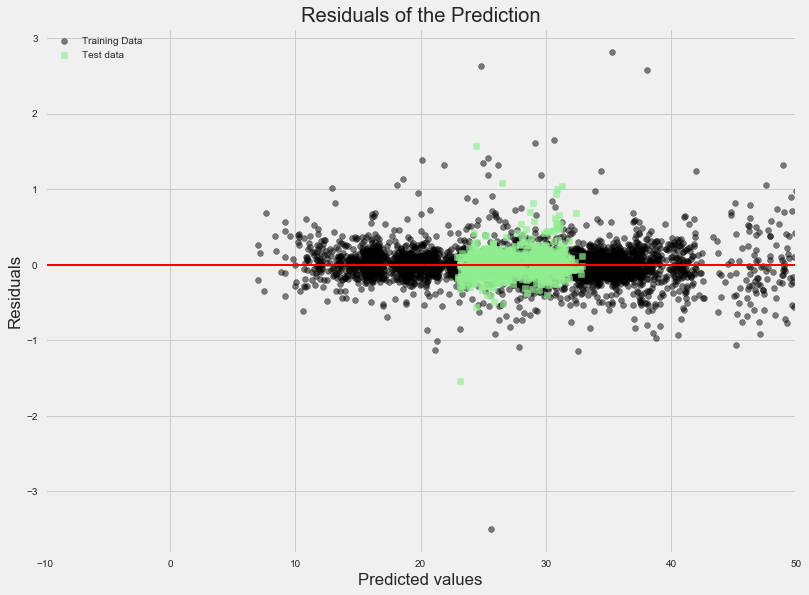

In [11]:
#Visualizations of the Residuals of the Prediction

plt.figure(figsize=(12,9))

plt.scatter(y_train_pred, y_train_pred -y_train, c='black', marker='o', s=35, alpha=0.5, label='Training Data')

plt.scatter(y_test_pred1, y_test_pred1-y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test data')



plt.title('Residuals of the Prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([-10, 50])

plt.show()

### Implementation of the Random Forest Algorithm

In [12]:
from sklearn.ensemble import RandomForestRegressor

"""A random forest, is an ensemble of multiple decision tree. Here we are subdividing the input space into smaller regions that 
   will become more manageable."""

#Assigning parameters for tuning the regressor 

forest=RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=1, max_depth=50)

forest.fit(X_scaled_train, y_train)

y_train_pred=forest.predict(X_scaled_train)
y_test_pred2=forest.predict(X_scaled_test)

#The Mean Squared Error and R^2 
print('MSE train: %.3f, test:%.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred2)))
print('RMSE train: %.3f, test:%.3f' %(sqrt(mean_squared_error(y_train, y_train_pred)), sqrt(mean_squared_error(y_test,y_test_pred2))))   
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred2)))   


MSE train: 0.012, test:0.050
RMSE train: 0.112, test:0.224
R^2 train: 1.000, test: 0.991


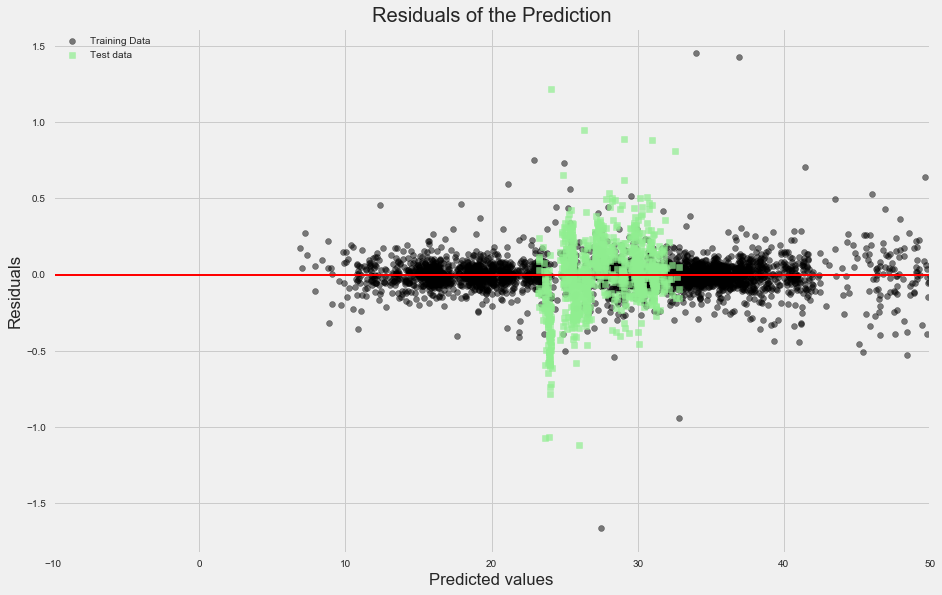

In [13]:
#Visualizations of the Residuals of the Prediction

plt.figure(figsize=(14,9))

plt.scatter(y_train_pred, y_train_pred -y_train, c='black', marker='o', s=35, alpha=0.5, label='Training Data')

plt.scatter(y_test_pred2, y_test_pred2-y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test data')



plt.title('Residuals of the Prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])

plt.show()

### Implementation of the Support Vector Machine(SVM) Algorithm 

In [14]:
from sklearn.svm import SVR

svr=SVR(kernel='linear', gamma=100.0, C=1.0)
svr.fit(X_scaled_train, y_train)

y_train_pred=svr.predict(X_scaled_train)
y_test_pred3=svr.predict(X_scaled_test)

#The Mean Squared Error, RMSE and R^2 
print('MSE train: %.3f, test:%.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred3)))
print('RMSE train: %.3f, test:%.3f' %(sqrt(mean_squared_error(y_train, y_train_pred)), sqrt(mean_squared_error(y_test,y_test_pred3))))     
print('R^2 train: %.7f, test: %.7f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred3)))    


#print(y_test_pred2)


MSE train: 0.067, test:0.025
RMSE train: 0.260, test:0.157
R^2 train: 0.9992302, test: 0.9956108


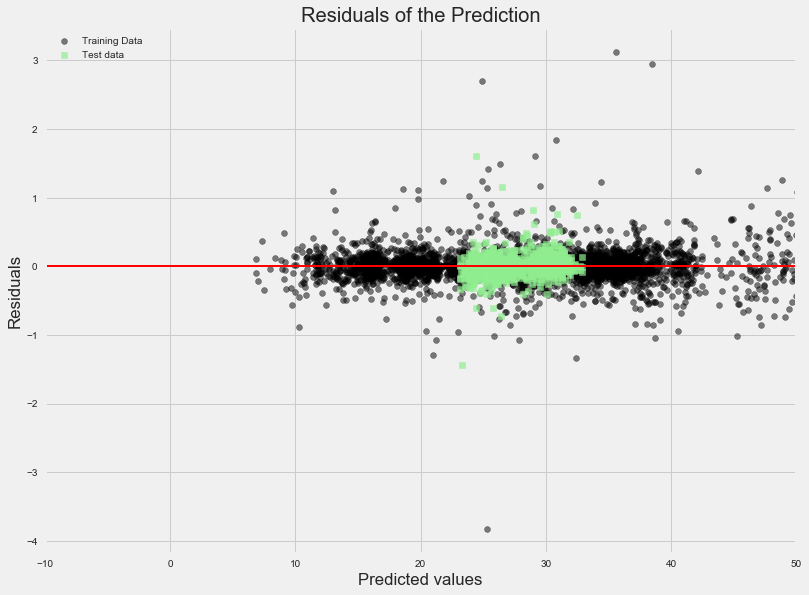

In [15]:
#Visualizations of the Residuals of the Prediction

plt.figure(figsize=(12,9))

plt.scatter(y_train_pred, y_train_pred -y_train, c='black', marker='o', s=35, alpha=0.5, label='Training Data')

plt.scatter(y_test_pred3, y_test_pred3-y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test data')



plt.title('Residuals of the Prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([-10, 50])

plt.show()

### The Benchmark (Using a Naive Forecast)

In [16]:
"""I will be using a Naive forecast, this forecasting method is suitable for Time Series data which is what we are working with. 
we will be using a seasonal naive approach with the autoregressive integrated moving average (ARIMA) model. This is a
generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to
better understand the data or to predict future points in the series (forecasting)."""

from statsmodels.tsa.arima_model import ARIMA

series=Adj_close #Using the adjusted close for the dates(January 1, 2000 - August 31, 2017)
X=series.values #Getthing the Adjusted closing prices ffrom the data  
#print(X)

#Partitioning the data for trainign and testing 
size=int(len(X)*0.77) 

train, test=X,  X[size:len(X)]

history=[values for values in train] #parsing through the training data 

predict=list()

for t in range(len(test)):
    model=ARIMA(history, order=(5,1,0))#Initializing the ARIMA module; 5,1,0 represents: 5-Number of lag obsrvations, 1-number of times raw observations are differenced and 0-order of the moving average 
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()#Using the ARIMA for making forecasts
    y_t=output[0]
    predict.append(y_t)
    obs = test[t]
    history.append(obs)
    
error=mean_squared_error(test, predict)
RMSE=sqrt(mean_squared_error(test,predict))     
R_2 = r2_score(test, predict)    


print('Test MSE: %.3f' %error)
print('Test RMSE: %.3f'%RMSE)
print('Test R_2: %.3f' %R_2)    

    

C:\Users\delis\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\delis\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\delis\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.089
Test RMSE: 0.299
Test R_2: 0.990


### Plot Comparison 

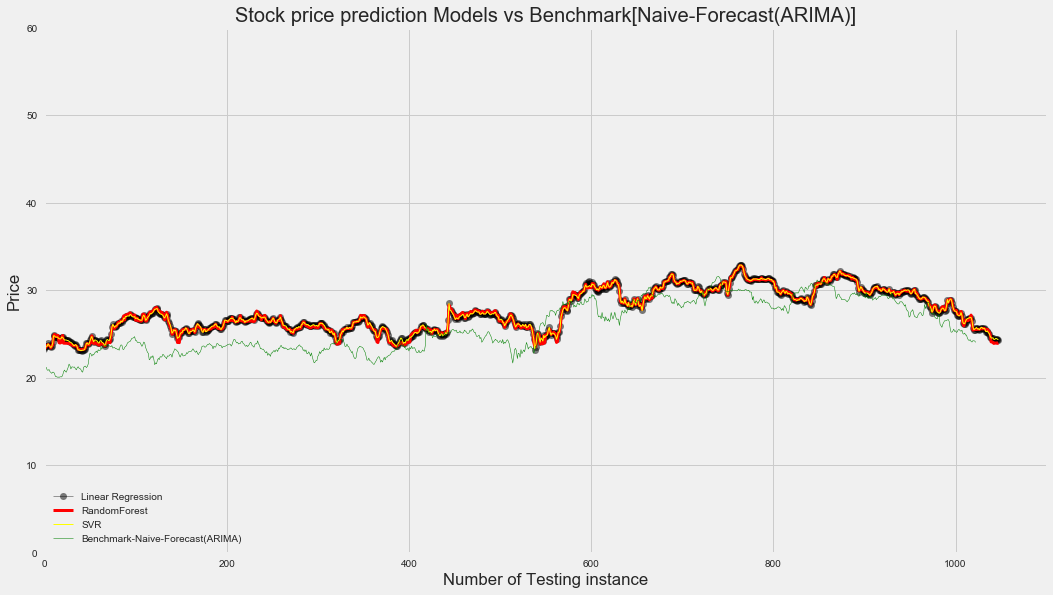

In [17]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.set_context(font_scale=3)

plt.xlim([0.0, 1100])
plt.ylim([0.0, 60])
lw=1
plt.title('Stock price prediction Models vs Benchmark[Naive-Forecast(ARIMA)]')

# Set figure width to 12 and height to 9




plt.xlabel('Number of Testing instance')
plt.ylabel('Price')

plt.plot(y_test_pred1, c='black',marker='o', lw=0.75,alpha=0.5, label='Linear Regression')
plt.plot(y_test_pred2, c='red', marker='x', lw=3, label='RandomForest')
plt.plot(y_test_pred3, c='yellow', lw=1, label='SVR')
plt.plot(predict,c='green', lw=0.5, label='Benchmark-Naive-Forecast(ARIMA)')


plt.legend(loc='lower left')
plt.show()